Import Statements
--

In [78]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from math import sqrt
import warnings

warnings.simplefilter("ignore")

Cluster
---

In [ ]:
pyspark.sql import SparkSession
spark = SparkSession.builder.master('spark://spark-master:7077')\
        .config("spark.executor.memory", "3g").config("spark.driver.memory", "2g").appName('Team_9_Soccer_Analysis').getOrCreate()

Load the Data
---

In [3]:
soccer = sqlite3.connect("database1.sqlite")

In [4]:
soccer

Team
---

In [5]:
Team = pd.read_sql("""SELECT * from team""", soccer)

In [6]:
Team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


Country
---

In [7]:
Country = pd.read_sql("""SELECT * from country""", soccer)

In [8]:
Country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


League
---

In [9]:
League = pd.read_sql("""SELECT * from league""", soccer)

In [10]:
League

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


Match
---

In [11]:
Match = pd.read_sql("""SELECT * from match""", soccer)

In [12]:
Match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


Player
---

In [13]:
Player = pd.read_sql("""SELECT * from player""", soccer)

In [14]:
Player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


Player Attributes
---

In [15]:
Player_Attributes = pd.read_sql("""SELECT * from player_attributes""", soccer)

In [16]:
Player_Attributes.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Team Attributes
---

In [17]:
Team_Attributes = pd.read_sql("""SELECT * from team_attributes""", soccer)

In [18]:
Team_Attributes.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


Some satistics from the roster
---

In [76]:
import numpy as np

all_players = pd.read_sql('SELECT * from player_attributes', soccer) 
ap = all_players.drop_duplicates(subset = ['player_api_id'])

print('Average overall rating of the players: ', round(ap['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(ap['crossing'].mean(),2))
print('Average vision rating of the players: ', round(ap['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(ap['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(ap['dribbling'].mean(),2))

Average overall rating of the players:  67.96
Average crosser rating of the players:  53.98
Average vision rating of the players:  56.28
Average heading accuracy rating of the players:  56.8
Average dribbling rating of the players:  57.75


Player Height vs. Average Overall Rating
---

<AxesSubplot:title={'center':'Potential vs Height'}, xlabel='calc_height'>

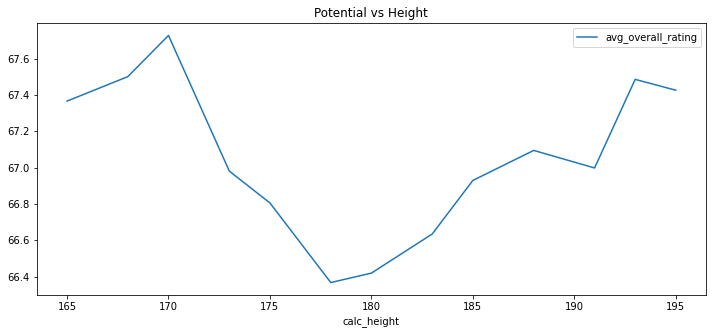

In [23]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", soccer)
players_height

players_height.plot(x='calc_height',y=['avg_overall_rating'],figsize=(12,5),title='Potential vs Height')

Linear Regression
---

In [80]:
player_att = pd.read_sql_query("SELECT * FROM Player_Attributes", soccer)
player_att

player_att.shape

player_att.columns

features = [
       'potential', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes']

target = ['overall_rating']

player_att = player_att.dropna()

X = player_att[features]

y = player_att[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=324)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_prediction = regressor.predict(X_test)

#print(regressor.intercept_)

#print(regressor.coef_)

score = regressor.score(X_test, y_test)
n=len(player_att[target])
p=len(features)
adjr= 1-(1-score)*(n-1)/(n-p-1)
print("RSquared: ",score)
print("")
print("AdjustedRSquared: ",adjr)
print("")
print('MAE', metrics.mean_absolute_error(y_test, y_prediction))
print("")
print('MSE', metrics.mean_squared_error(y_test, y_prediction))
print("")
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_prediction)))

RSquared:  0.8412690897596594

AdjustedRSquared:  0.8412391602960523

MAE 2.1410053900019252

MSE 7.86972518469513

RMSE 2.805303046855211


Average Goals per Game & Average Difference Between Home vs. Away
---

<AxesSubplot:title={'center':'Average Goals Difference Home vs Away'}>

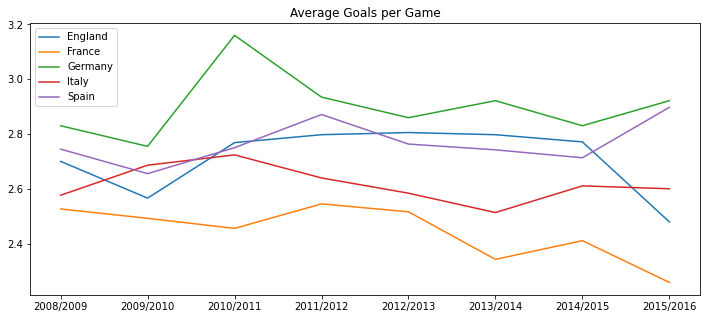

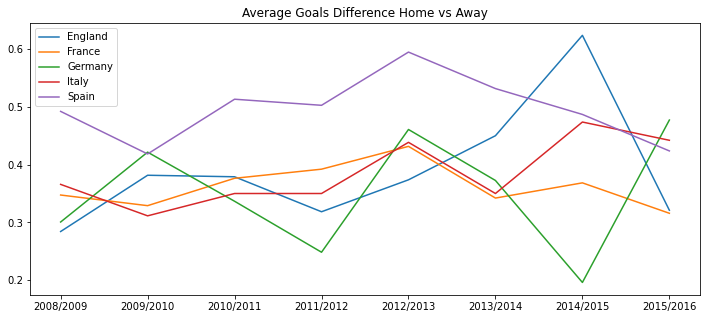

In [32]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", soccer)
leages_by_season

import numpy as np


df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game')

df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Away')

Player Height vs. Player Weight
---

Cardinality of Feature: Height - 0.181%
Cardinality of Feature: Weight - 0.452%


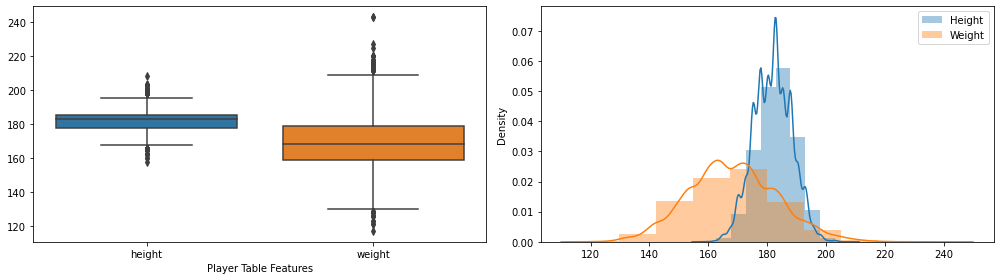

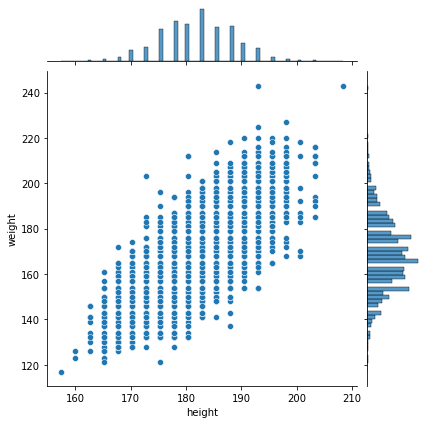

In [52]:
player_table = pd.read_sql_query("SELECT * FROM Player", soccer)
player_att_table = pd.read_sql_query("SELECT * FROM Player_Attributes", soccer)
match_table = pd.read_sql_query("SELECT * FROM Match", soccer)
league_table = pd.read_sql_query("SELECT * FROM League", soccer)
country_table = pd.read_sql_query("SELECT * FROM Country", soccer)
team_table = pd.read_sql_query("SELECT * FROM Team", soccer)
team_att_table = pd.read_sql_query("SELECT * FROM Team_Attributes", soccer)

fig1, ax1 = plt.subplots(nrows = 1, ncols = 2)
fig1.set_size_inches(14,4)
sns.boxplot(data = player_table.loc[:,["height",'weight']], ax = ax1[0])
ax1[0].set_xlabel('Player Table Features')
ax1[0].set_ylabel('')
sns.distplot(a = player_table.loc[:,["height"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Height')
sns.distplot(a = player_table.loc[:,["weight"]], bins= 10, kde = True, ax = ax1[1], \
            label = 'Weight')
ax1[1].legend()
sns.jointplot(x='height',y = 'weight',data = player_table,kind = 'scatter')
fig1.tight_layout()

print("Cardinality of Feature: Height - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'height'])) / len(player_table.loc[:,'height']))))
print("Cardinality of Feature: Weight - {:0.3f}%".format( \
        100 * (len(np.unique(player_table.loc[:,'weight'])) / len(player_table.loc[:,'weight']))))

Player Attribution Correlation
---

<AxesSubplot:>

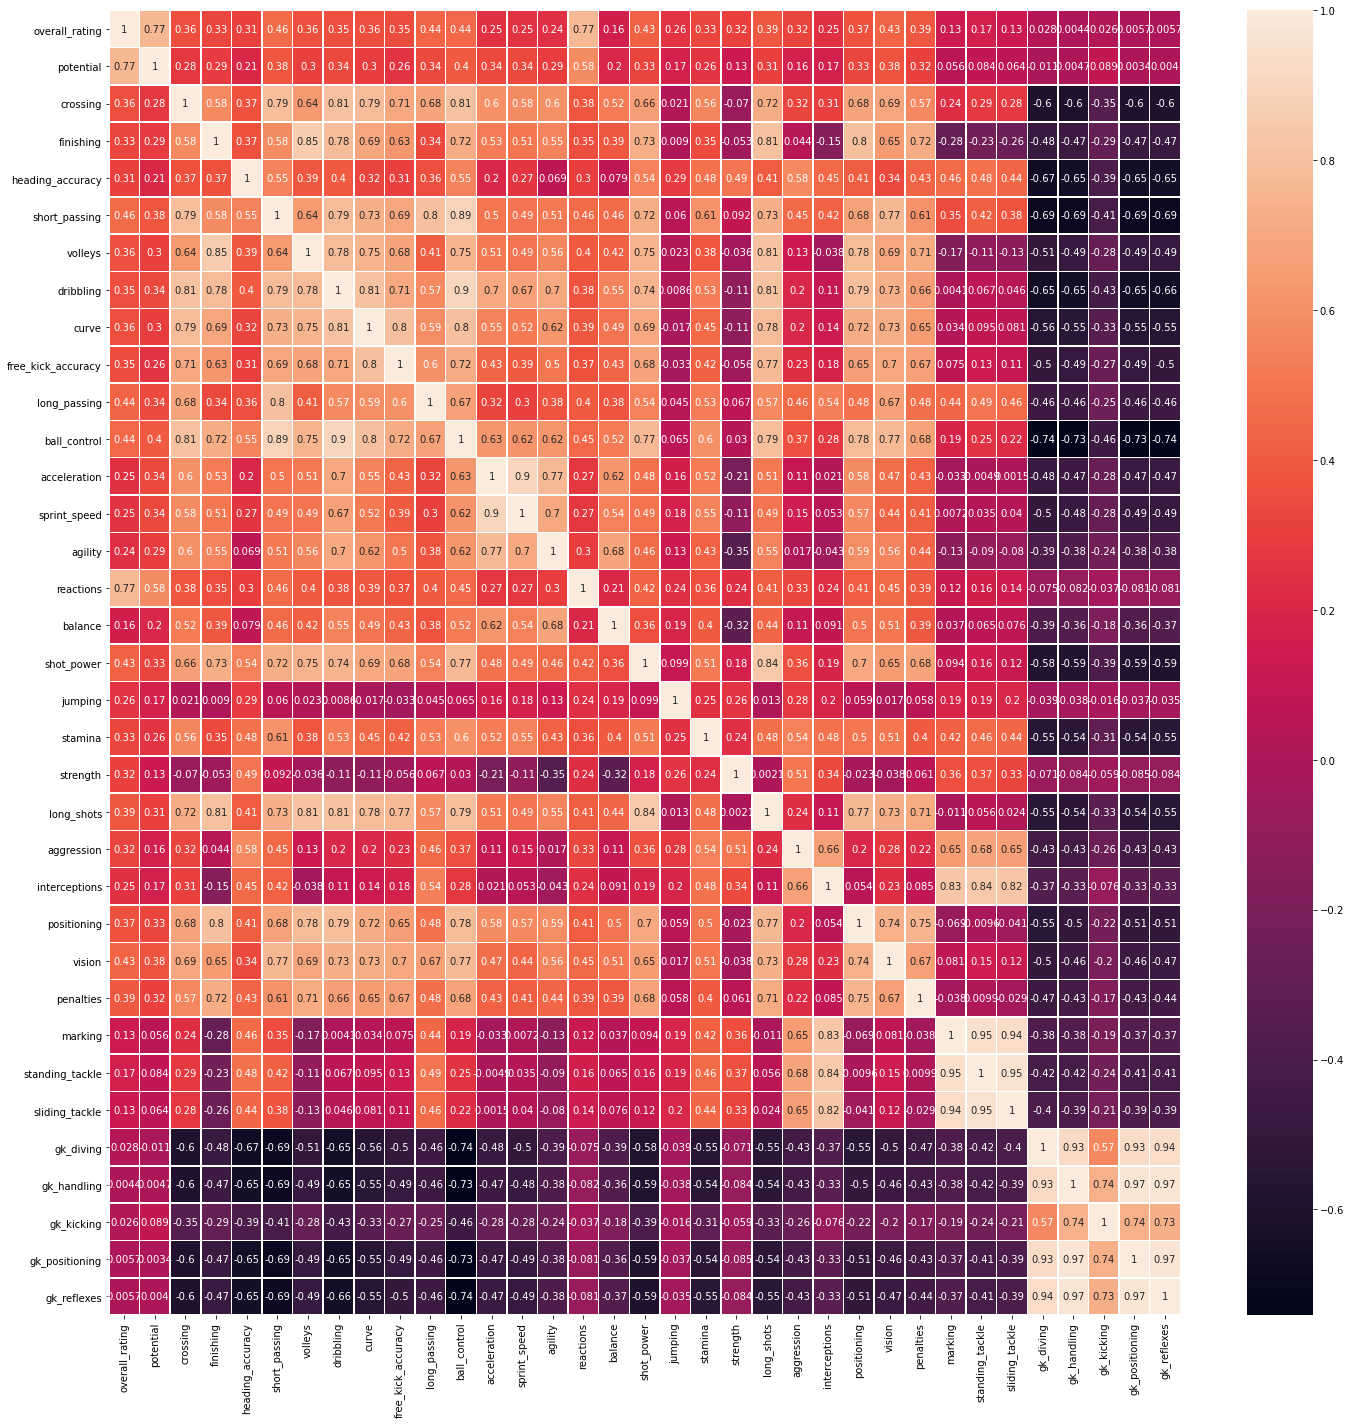

In [53]:
corr2 = player_att_table.select_dtypes(include =['float64','int64']).\
loc[:,player_att_table.select_dtypes(include =['float64','int64']).columns[3:]].corr()

fig2,ax2 = plt.subplots(nrows = 1,ncols = 1)
fig2.set_size_inches(w=24,h=24)
sns.heatmap(corr2,annot = True,linewidths=0.5,ax = ax2)

Player Foot Preference and Attacking/Defending Work Rate
---

(176161, 42)


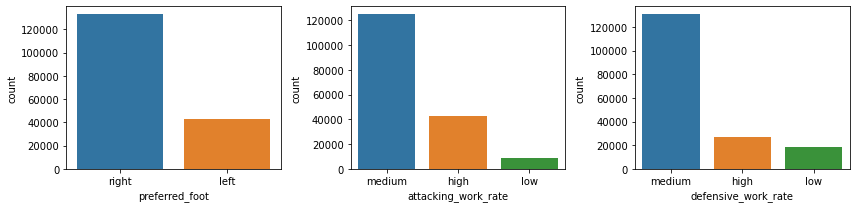

In [58]:
player_att_table_updated1 = player_att_table.loc[(player_att_table['attacking_work_rate'].\
                                                  isin(['medium','high','low'])\
                       & player_att_table['defensive_work_rate'].isin(['medium','high','low'])),:]
print(player_att_table_updated1.shape)
player_att_table_updated1.head()

fig4, ax4 = plt.subplots(nrows = 1, ncols = 3)
fig4.set_size_inches(12,3)
sns.countplot(x = player_att_table_updated1['preferred_foot'],ax = ax4[0])
sns.countplot(x = player_att_table_updated1['attacking_work_rate'],ax = ax4[1])
sns.countplot(x = player_att_table_updated1['defensive_work_rate'],ax = ax4[2])
fig4.tight_layout()

Real Madrid Statistics and Visualizations
---

Average overall rating of the players:  82.29
Average crosser rating of the players:  66.48
Average vision rating of the players:  70.57
Average heading accuracy rating of the players:  60.95
Average dribbling rating of the players:  70.29



Average height of the players:  181.55
Average weight of the players:  167.0
Number of Left footed players:  3
Number of Right footed players:  18



        Team Name Short Name  AVG Home Goals per Game  \
0  Real Madrid CF        REA                 0.947368   

   AVG Away Goals per Game  Home and Away Goal Diff.  \
0                 2.105263                 -1.157895   

   Average Goals Overall per Game  Total Goals     season  
0                        3.052632           58  2015/2016  








Text(0.5, 1.0, "Real Madrid match's results from 2008 to 2015")

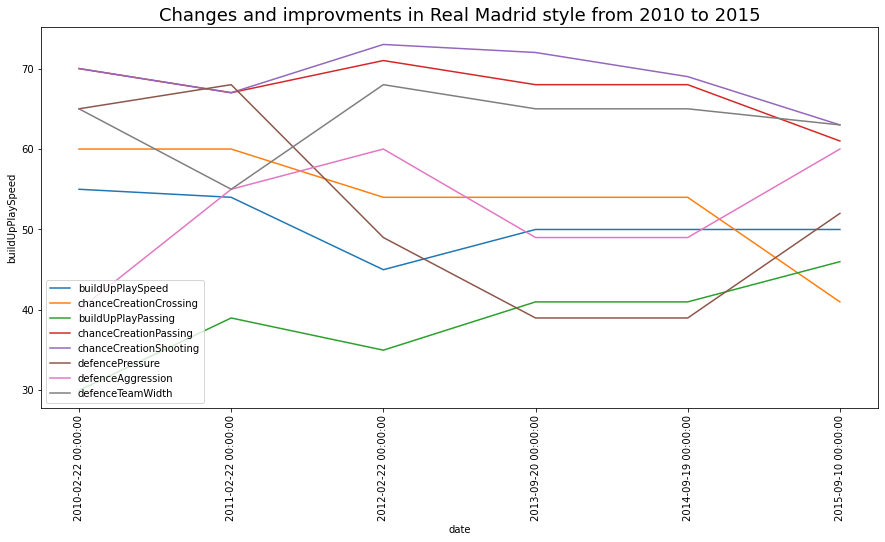

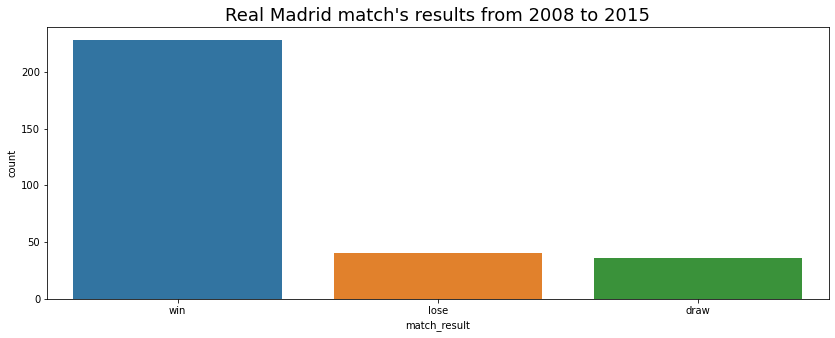

In [67]:
# Real Madrid Stats and Graphs
Real_Madrid_players = pd.read_sql('SELECT p.player_api_id, p.player_name, p.birthday, p.height, p.weight, pa.preferred_foot, pa.vision, pa.crossing, pa.overall_rating, pa.heading_accuracy, pa.dribbling from player as p join player_attributes as pa on p.player_fifa_api_id = pa.player_fifa_api_id where p.player_name in ("Francisco Casilla", "Keylor Navas", "Alvaro Arbeloa", "Daniel Carvajal", "Danilo", "Marcelo", "Pepe", "Sergio Ramos", "Raphael Varane", "Casemiro", "Isco", "Mateo Kovacic", "Toni Kroos", "Luka Modric", "James Rodriguez", "Gareth Bale", "Karim Benzema", "Borja Mayoral", "Cristiano Ronaldo", "Jese Rodriguez", "Lucas Vazquez")',soccer)
bp = Real_Madrid_players.drop_duplicates(subset = ['player_api_id'])
bp = bp[bp.player_api_id != 143403]
bp = bp[bp.player_api_id != 185909]
bp = bp[bp.player_api_id != 19249]
bp = bp[bp.player_api_id != 208943]
bp = bp[bp.player_api_id != 281339]
bp = bp[bp.player_api_id != 570432]
bp = bp[bp.player_api_id != 280350]
bp = bp[bp.player_api_id != 429224]
bp = bp[bp.player_api_id != 78908]
print('Average overall rating of the players: ', round(bp['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(bp['crossing'].mean(),2))
print('Average vision rating of the players: ', round(bp['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(bp['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(bp['dribbling'].mean(),2))

print("")
print("")
print("")

print('Average height of the players: ', round(bp['height'].mean(),2))
print('Average weight of the players: ', round(bp['weight'].mean(),0))
print('Number of Left footed players: ', sum(bp['preferred_foot'] == 'left'))
print('Number of Right footed players: ', sum(bp['preferred_foot'] == 'right'))

print("")
print("")
print("")
RM_goals = pd.read_sql('SELECT t.team_long_name as "Team Name", t.team_short_name as "Short Name", avg(home_team_goal) AS "AVG Home Goals per Game", avg(away_team_goal) AS "AVG Away Goals per Game", avg(home_team_goal-away_team_goal) AS "Home and Away Goal Diff.", avg(home_team_goal+away_team_goal) AS "Average Goals Overall per Game", sum(home_team_goal+away_team_goal) AS "Total Goals", match.season from match inner join team as t on team_api_id = away_team_api_id where t.team_long_name = "Real Madrid CF" and match.season = "2015/2016"', soccer)         
print(RM_goals.head())

print("")
print("")
print("")

Real_Madrid_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Real Madrid CF"
                                        
                        
                        """, soccer)
Real_Madrid_Statistics

plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Real_Madrid_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Real Madrid style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Real_Madrid_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Real_Madrid_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Real_Madrid_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Real_Madrid_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Real_Madrid_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Real_Madrid_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Real_Madrid_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)

print("")
print("")
print("")

Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, soccer)

Matchs_results

home_RM = Matchs_results[Matchs_results["Home_team"] == "Real Madrid CF"]
away_RM = Matchs_results[Matchs_results["away_team"] == "Real Madrid CF"]
home_RM['match_result'] = np.where(home_RM['home_team_goal'] > home_RM['away_team_goal'], 'win', 'lose')
home_RM['match_result'] = np.where(home_RM['home_team_goal'] == home_RM['away_team_goal'], 'draw', home_RM['match_result'])

away_RM['match_result'] = np.where(away_RM['home_team_goal'] < away_RM['away_team_goal'], 'win', 'lose')
away_RM['match_result'] = np.where(away_RM['home_team_goal'] == away_RM['away_team_goal'], 'draw', away_RM['match_result'])


RM = pd.concat([home_RM, away_RM])
RM

plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=RM ).set_title("Real Madrid match's results from 2008 to 2015", fontsize=18)

Totenham Hotspur Statistics and Visualizations
---

Average overall rating of the players:  78.0
Average crosser rating of the players:  64.05
Average vision rating of the players:  67.29
Average heading accuracy rating of the players:  61.0
Average dribbling rating of the players:  68.62



Average height of the players:  182.64
Average weight of the players:  166.0
Number of Left footed players:  9
Number of Right footed players:  12



           Team Name Short Name  AVG Home Goals per Game  \
0  Tottenham Hotspur        TOT                 1.052632   

   AVG Away Goals per Game  Home and Away Goal Diff.  \
0                 1.789474                 -0.736842   

   Average Goals Overall per Game  Total Goals     season  
0                        2.842105           54  2015/2016  





Text(0.5, 1.0, "Tottenham Hotspur match's results from 2008 to 2015")

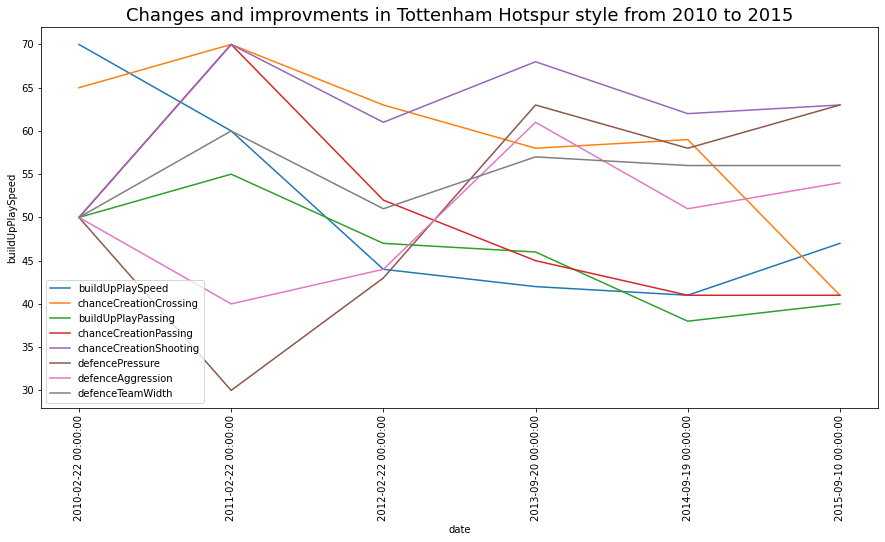

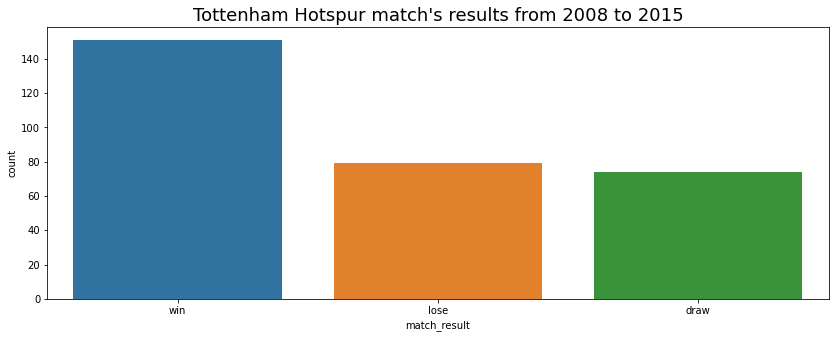

In [69]:
# Tottenham Stats and Graphs
TH_players = pd.read_sql('SELECT p.player_api_id, p.player_name, p.birthday, p.height, p.weight, pa.preferred_foot, pa.vision, pa.crossing, pa.overall_rating, pa.heading_accuracy, pa.dribbling from player as p join player_attributes as pa on p.player_fifa_api_id = pa.player_fifa_api_id where p.player_name in ("Hugo Lloris", "Michel Vorm", "Luke McGee", "Kyle Walker", "Danny Rose", "Toby Alderweireld", "Jan Vertonghen", "Kieran Trippier", "Kevin Wimmer", "Ben Davies", "Nabil Bentaleb", "Ryan Mason", "Erik Lamela", "Eric Dier", "Moussa Dembele", "Dele Alli", "Nacer Chadli", "Christian Eriksen", "Josh Onomah", "Thomas Carroll", "Heung-Min Son", "Harry Kane", "Clinton Njie")',soccer)
thh = TH_players.drop_duplicates(subset = ['player_api_id'])

thh = thh[thh.player_api_id != 509148]

#thh

print('Average overall rating of the players: ', round(thh['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(thh['crossing'].mean(),2))
print('Average vision rating of the players: ', round(thh['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(thh['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(thh['dribbling'].mean(),2))

print("")
print("")
print("")

print('Average height of the players: ', round(thh['height'].mean(),2))
print('Average weight of the players: ', round(thh['weight'].mean(),0))
print('Number of Left footed players: ', sum(thh['preferred_foot'] == 'left'))
print('Number of Right footed players: ', sum(thh['preferred_foot'] == 'right'))

print("")
print("")
print("")

TH_goals = pd.read_sql('SELECT t.team_long_name as "Team Name", t.team_short_name as "Short Name", avg(home_team_goal) AS "AVG Home Goals per Game", avg(away_team_goal) AS "AVG Away Goals per Game", avg(home_team_goal-away_team_goal) AS "Home and Away Goal Diff.", avg(home_team_goal+away_team_goal) AS "Average Goals Overall per Game", sum(home_team_goal+away_team_goal) AS "Total Goals", match.season from match inner join team as t on team_api_id = away_team_api_id where t.team_long_name = "Tottenham Hotspur" and match.season = "2015/2016"', soccer)         
print(TH_goals)

print("")
print("")
print("")

Tottenham_Hotspur_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Tottenham Hotspur"
                                        
                        
                        """, soccer)
Tottenham_Hotspur_Statistics

plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Tottenham_Hotspur_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Tottenham Hotspur style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Tottenham_Hotspur_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Tottenham_Hotspur_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Tottenham_Hotspur_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Tottenham_Hotspur_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Tottenham_Hotspur_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Tottenham_Hotspur_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Tottenham_Hotspur_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)




Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, soccer)

Matchs_results

home_TH = Matchs_results[Matchs_results["Home_team"] == "Tottenham Hotspur"]
away_TH = Matchs_results[Matchs_results["away_team"] == "Tottenham Hotspur"]
home_TH['match_result'] = np.where(home_TH['home_team_goal'] > home_TH['away_team_goal'], 'win', 'lose')
home_TH['match_result'] = np.where(home_TH['home_team_goal'] == home_TH['away_team_goal'], 'draw', home_TH['match_result'])

away_TH['match_result'] = np.where(away_TH['home_team_goal'] < away_TH['away_team_goal'], 'win', 'lose')
away_TH['match_result'] = np.where(away_TH['home_team_goal'] == away_TH['away_team_goal'], 'draw', away_TH['match_result'])


TH = pd.concat([home_TH, away_TH])
TH

plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=TH ).set_title("Tottenham Hotspur match's results from 2008 to 2015", fontsize=18)

Arsenal Statistics and Visualizations
---

Average overall rating of the players:  78.15
Average crosser rating of the players:  64.46
Average vision rating of the players:  67.23
Average heading accuracy rating of the players:  58.81
Average dribbling rating of the players:  69.04



Average height of the players:  180.44
Average weight of the players:  160.0
Number of Left footed players:  6
Number of Right footed players:  20



  Team Name Short Name  AVG Home Goals per Game  AVG Away Goals per Game  \
0   Arsenal        ARS                 1.315789                 1.789474   

   Home and Away Goal Diff.  Average Goals Overall per Game  Total Goals  \
0                 -0.473684                        3.105263           59   

      season  
0  2015/2016  





Text(0.5, 1.0, "Arsenal match's results from 2008 to 2015")

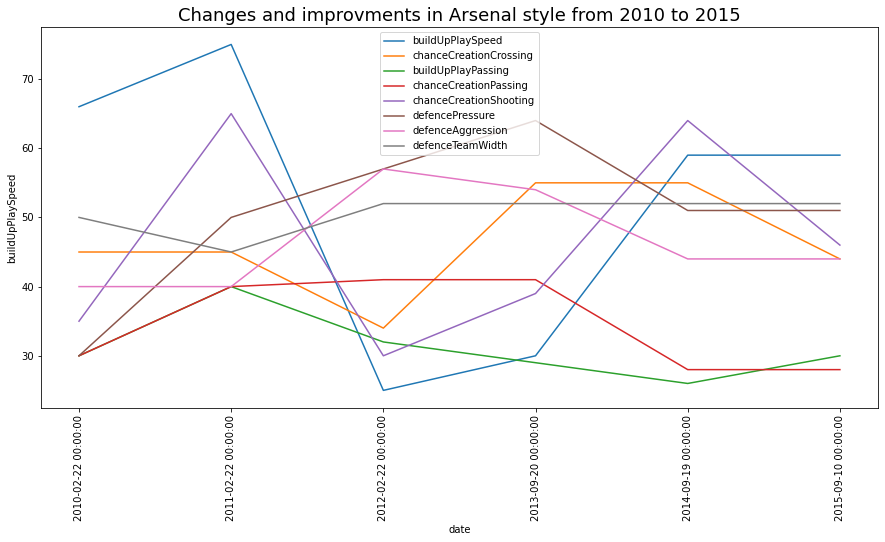

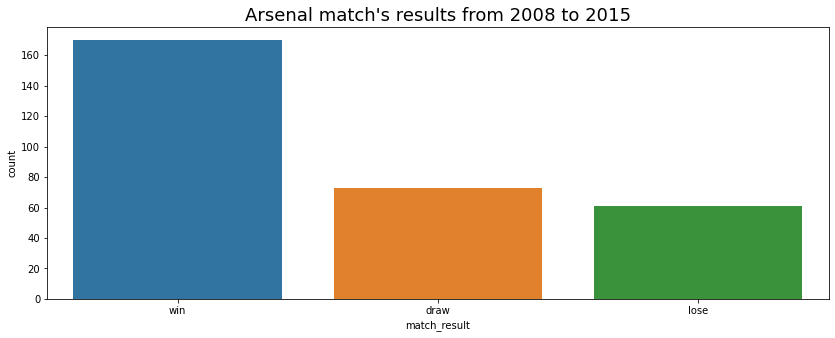

In [71]:
# Arsenal Stats and Graphs
Arsenal_players = pd.read_sql('SELECT p.player_api_id, p.player_name, p.birthday, p.height, p.weight, pa.preferred_foot, pa.vision, pa.crossing, pa.overall_rating, pa.heading_accuracy, pa.dribbling from player as p join player_attributes as pa on p.player_fifa_api_id = pa.player_fifa_api_id where p.player_name in ("Petr Cech", "Matt Macey", "David Ospina", "Calum Chambers", "Gabriel Paulista", "Kieran Gibbs", "Hector Bellerin", "Laurent Koscielny", "Per Mertesacker", "Nacho Monreal", "Ismael Bennacer", "Krystian Bielik", "Francis Coquelin", "Mohamed Elneny", "Mathieu Flamini", "Mikel Arteta", "Mesut Ozil", "Aaron Ramsey", "Jeff Reine-Adelaide", "Tomas Rosicky", "Santi Cazorla", "Ben Sheaf", "Jack Wilshere", "Joel Campbell", "Olivier Giroud", "Serge Gnabry", "Alex Iwobi", "Alex Oxlade-Chamberlain", "Alexis Sanchez", "Theo Walcott", "Danny Welbeck", "Chris Willock")',soccer)
bp = Arsenal_players.drop_duplicates(subset = ['player_api_id'])
bp

print('Average overall rating of the players: ', round(bp['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(bp['crossing'].mean(),2))
print('Average vision rating of the players: ', round(bp['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(bp['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(bp['dribbling'].mean(),2))

print("")
print("")
print("")

print('Average height of the players: ', round(bp['height'].mean(),2))
print('Average weight of the players: ', round(bp['weight'].mean(),0))
print('Number of Left footed players: ', sum(bp['preferred_foot'] == 'left'))
print('Number of Right footed players: ', sum(bp['preferred_foot'] == 'right'))

print("")
print("")
print("")

Ar_goals = pd.read_sql('SELECT t.team_long_name as "Team Name", t.team_short_name as "Short Name", avg(home_team_goal) AS "AVG Home Goals per Game", avg(away_team_goal) AS "AVG Away Goals per Game", avg(home_team_goal-away_team_goal) AS "Home and Away Goal Diff.", avg(home_team_goal+away_team_goal) AS "Average Goals Overall per Game", sum(home_team_goal+away_team_goal) AS "Total Goals", match.season from match inner join team as t on team_api_id = away_team_api_id where t.team_long_name = "Arsenal" and match.season = "2015/2016"', soccer)         
print(Ar_goals)

print("")
print("")
print("")
Arsenal_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Arsenal"
                                        
                        
                        """, soccer)
Arsenal_Statistics

plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Arsenal_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Arsenal style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Arsenal_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Arsenal_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Arsenal_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Arsenal_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Arsenal_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Arsenal_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Arsenal_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)




Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, soccer)

Matchs_results

home_A = Matchs_results[Matchs_results["Home_team"] == "Arsenal"]
away_A = Matchs_results[Matchs_results["away_team"] == "Arsenal"]
home_A['match_result'] = np.where(home_A['home_team_goal'] > home_A['away_team_goal'], 'win', 'lose')
home_A['match_result'] = np.where(home_A['home_team_goal'] == home_A['away_team_goal'], 'draw', home_A['match_result'])

away_A['match_result'] = np.where(away_A['home_team_goal'] < away_A['away_team_goal'], 'win', 'lose')
away_A['match_result'] = np.where(away_A['home_team_goal'] == away_A['away_team_goal'], 'draw', away_A['match_result'])


A = pd.concat([home_A, away_A])
A

plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=A ).set_title("Arsenal match's results from 2008 to 2015", fontsize=18)

Leicester City Statistics and Visualization
---

Average overall rating of the players:  73.52
Average crosser rating of the players:  56.78
Average vision rating of the players:  59.93
Average heading accuracy rating of the players:  58.0
Average dribbling rating of the players:  61.48



Average height of the players:  181.28
Average weight of the players:  170.0
Number of Left footed players:  3
Number of Right footed players:  24



        Team Name Short Name  AVG Home Goals per Game  \
0  Leicester City        LEI                 0.947368   

   AVG Away Goals per Game  Home and Away Goal Diff.  \
0                 1.736842                 -0.789474   

   Average Goals Overall per Game  Total Goals     season  
0                        2.684211           51  2015/2016  





Text(0.5, 1.0, "Leicester City match's results from 2008 to 2015")

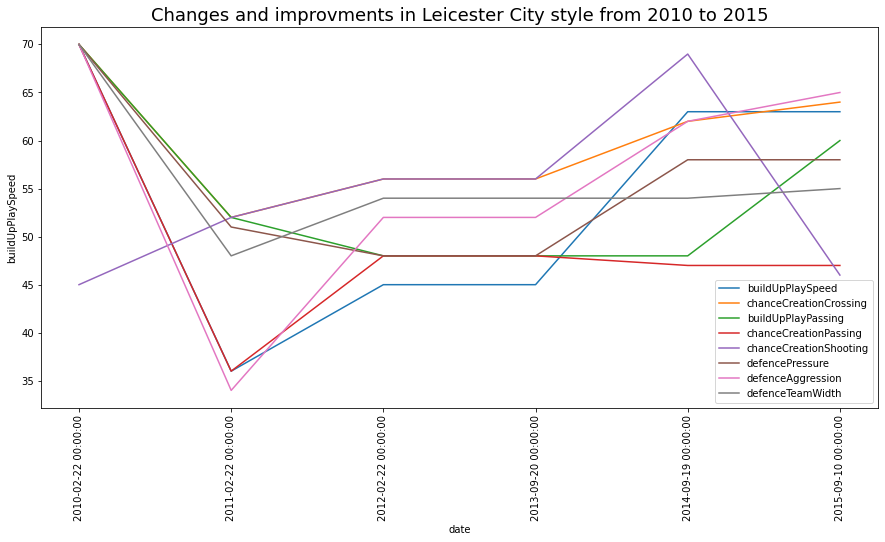

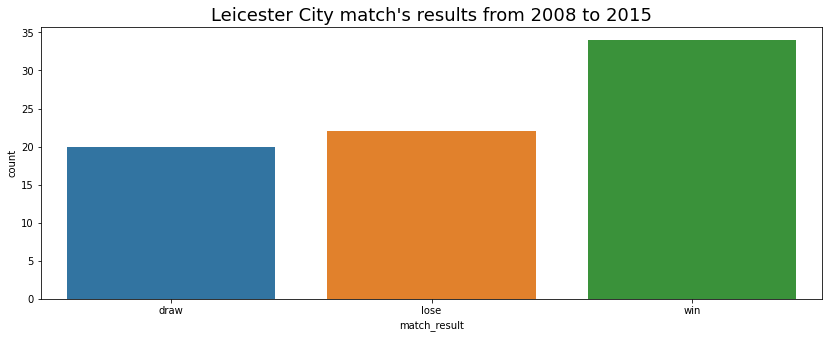

In [72]:
# Leicester City Stats and Graphs
LC_players = pd.read_sql('SELECT p.player_api_id, p.player_name, p.birthday, p.height, p.weight, pa.preferred_foot, pa.vision, pa.crossing, pa.overall_rating, pa.heading_accuracy, pa.dribbling from player as p join player_attributes as pa on p.player_fifa_api_id = pa.player_fifa_api_id where p.player_name in ("Kasper Schmeichel", "Ben Hamer", "Mark Schwarzer", "Ritchie De Laet", "Wes Morgan", "Robert Huth", "Daniel Amartey", "Danny Simpson", "Liam Moore", "Marcin Wasilewski", "Christian Fuchs", "Yohan Benalouane", "Danny Drinkwater", "Matthew James", "Andy King", "Marc Albrighton", "N\'Golo Kante", "Jeffrey Schlupp", "Demarai Gray", "Nathan Dyer", "Riyad Mahrez", "Gokhan Inler", "Jamie Vardy", "Tom Lawrence", "Andrej Kramaric", "Shinji Okazaki", "Jose Leonardo Ulloa")',soccer)
LC = LC_players.drop_duplicates(subset = ['player_api_id'])

#LC

print('Average overall rating of the players: ', round(LC['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(LC['crossing'].mean(),2))
print('Average vision rating of the players: ', round(LC['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(LC['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(LC['dribbling'].mean(),2))

print("")
print("")
print("")

print('Average height of the players: ', round(LC['height'].mean(),2))
print('Average weight of the players: ', round(LC['weight'].mean(),0))
print('Number of Left footed players: ', sum(LC['preferred_foot'] == 'left'))
print('Number of Right footed players: ', sum(LC['preferred_foot'] == 'right'))

print("")
print("")
print("")

LC_goals = pd.read_sql('SELECT t.team_long_name as "Team Name", t.team_short_name as "Short Name", avg(home_team_goal) AS "AVG Home Goals per Game", avg(away_team_goal) AS "AVG Away Goals per Game", avg(home_team_goal-away_team_goal) AS "Home and Away Goal Diff.", avg(home_team_goal+away_team_goal) AS "Average Goals Overall per Game", sum(home_team_goal+away_team_goal) AS "Total Goals", match.season from match inner join team as t on team_api_id = away_team_api_id where t.team_long_name = "Leicester City" and match.season = "2015/2016"', soccer)         
print(LC_goals)

print("")
print("")
print("")

Leicester_City_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "Leicester City"
                                        
                        
                        """, soccer)
Leicester_City_Statistics

plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=Leicester_City_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in Leicester City style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=Leicester_City_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=Leicester_City_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=Leicester_City_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=Leicester_City_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=Leicester_City_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=Leicester_City_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=Leicester_City_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)




Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, soccer)

Matchs_results

home_LC = Matchs_results[Matchs_results["Home_team"] == "Leicester City"]
away_LC = Matchs_results[Matchs_results["away_team"] == "Leicester City"]
home_LC['match_result'] = np.where(home_LC['home_team_goal'] > home_LC['away_team_goal'], 'win', 'lose')
home_LC['match_result'] = np.where(home_LC['home_team_goal'] == home_LC['away_team_goal'], 'draw', home_LC['match_result'])

away_LC['match_result'] = np.where(away_LC['home_team_goal'] < away_LC['away_team_goal'], 'win', 'lose')
away_LC['match_result'] = np.where(away_LC['home_team_goal'] == away_LC['away_team_goal'], 'draw', away_LC['match_result'])


LC = pd.concat([home_LC, away_LC])
LC

plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=LC ).set_title("Leicester City match's results from 2008 to 2015", fontsize=18)

FC Barcelona Statistics and Graphs
---

Average overall rating of the players:  79.03
Average crosser rating of the players:  61.38
Average vision rating of the players:  66.29
Average heading accuracy rating of the players:  59.72
Average dribbling rating of the players:  66.84



Average height of the players:  179.71
Average weight of the players:  168.0
Number of Left footed players:  8
Number of Right footed players:  24



      Team Name Short Name  AVG Home Goals per Game  AVG Away Goals per Game  \
0  FC Barcelona        BAR                 0.789474                 2.368421   

   Home and Away Goal Diff.  Average Goals Overall per Game  Total Goals  \
0                 -1.578947                        3.157895           60   

      season  
0  2015/2016  





Text(0.5, 1.0, "FC Barcelona match's results from 2008 to 2015")

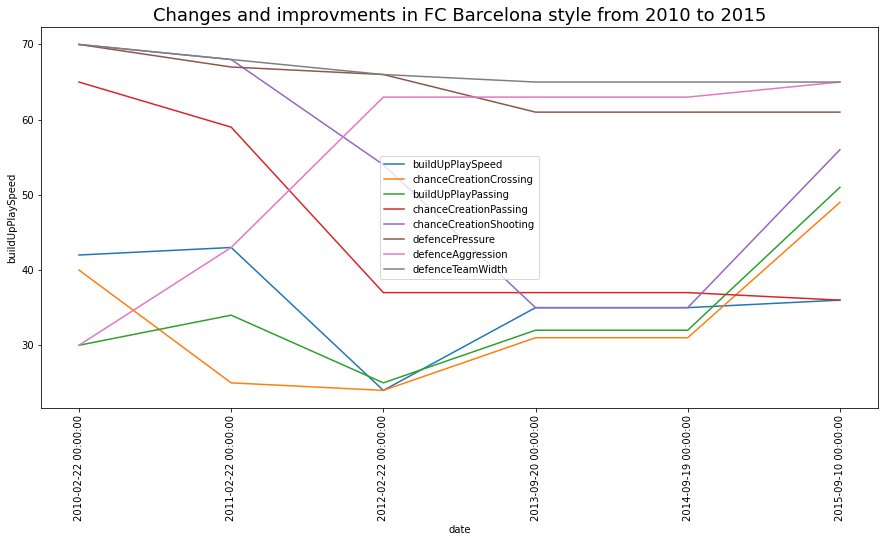

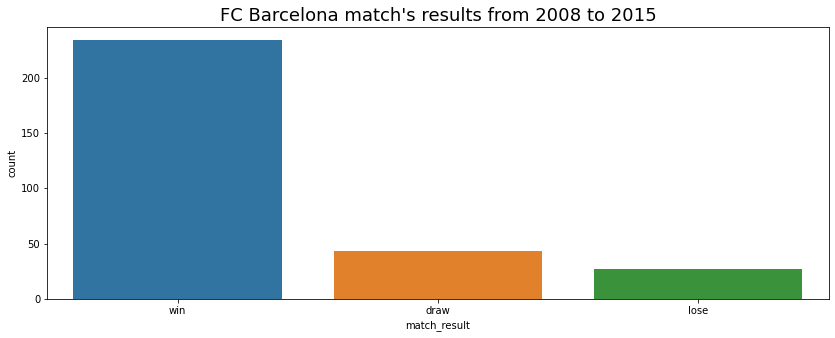

In [73]:
# FC Barcelona Stats and Graphs

Barcelona_players = pd.read_sql('SELECT p.player_api_id, p.player_name, p.birthday, p.height, p.weight, pa.preferred_foot, pa.vision, pa.crossing, pa.overall_rating, pa.heading_accuracy, pa.dribbling from player as p join player_attributes as pa on p.player_fifa_api_id = pa.player_fifa_api_id where p.player_name in ("Claudio Bravo", "Marc-Andre ter Stegen", "Jordi Masip", "Daniel Alves", "Jordi Alba", "Gerard Pique", "Javier Mascherano", "Jeremy Mathieu", "Thomas Vermaelen", "Marc Bartra", "Douglas", "Adriano", "Aleix Vidal", "Andres Iniesta", "Ivan Rakitic", "Sergio Busquets", "Sergi Roberto", "Rafinha", "Lionel Messi", "Neymar", "Luis Suarez", "Arda Turan", "Munir El Haddadi", "Sandro Ramirez") AND pa.id != 146137',soccer)
bp = Barcelona_players.drop_duplicates(subset = ['player_api_id'])
print('Average overall rating of the players: ', round(bp['overall_rating'].mean(),2))
print('Average crosser rating of the players: ', round(bp['crossing'].mean(),2))
print('Average vision rating of the players: ', round(bp['vision'].mean(),2))
print('Average heading accuracy rating of the players: ', round(bp['heading_accuracy'].mean(),2))
print('Average dribbling rating of the players: ', round(bp['dribbling'].mean(),2))

print("")
print("")
print("")

print('Average height of the players: ', round(bp['height'].mean(),2))
print('Average weight of the players: ', round(bp['weight'].mean(),0))
print('Number of Left footed players: ', sum(bp['preferred_foot'] == 'left'))
print('Number of Right footed players: ', sum(bp['preferred_foot'] == 'right'))

print("")
print("")
print("")

B_goals = pd.read_sql('SELECT t.team_long_name as "Team Name", t.team_short_name as "Short Name", avg(home_team_goal) AS "AVG Home Goals per Game", avg(away_team_goal) AS "AVG Away Goals per Game", avg(home_team_goal-away_team_goal) AS "Home and Away Goal Diff.", avg(home_team_goal+away_team_goal) AS "Average Goals Overall per Game", sum(home_team_goal+away_team_goal) AS "Total Goals", match.season from match inner join team as t on team_api_id = away_team_api_id where t.team_long_name = "FC Barcelona" and match.season = "2015/2016"', soccer)         
print(B_goals)

print("")
print("")
print("")

FC_Barcelona_Statistics = pd.read_sql("""SELECT *
 
                                        FROM Team 

                                        left join Team_Attributes
                                        
                                        on Team_Attributes.team_api_id = Team.team_api_id
                                        
                                        where team_long_name= "FC Barcelona"
                                        
                        
                        """, soccer)
FC_Barcelona_Statistics

plt.figure(figsize=(15, 7))

sns.lineplot(x="date",y="buildUpPlaySpeed",data=FC_Barcelona_Statistics, label="buildUpPlaySpeed").set_title("Changes and improvments in FC Barcelona style from 2010 to 2015", fontsize=18)
sns.lineplot(x="date",y="chanceCreationCrossing",data=FC_Barcelona_Statistics, label="chanceCreationCrossing")
sns.lineplot(x="date",y="buildUpPlayPassing",data=FC_Barcelona_Statistics, label="buildUpPlayPassing")
sns.lineplot(x="date",y="chanceCreationPassing",data=FC_Barcelona_Statistics, label="chanceCreationPassing")
sns.lineplot(x="date",y="chanceCreationShooting",data=FC_Barcelona_Statistics, label="chanceCreationShooting")
sns.lineplot(x="date",y="defencePressure",data=FC_Barcelona_Statistics, label="defencePressure")
sns.lineplot(x="date",y="defenceAggression",data=FC_Barcelona_Statistics, label="defenceAggression")
sns.lineplot(x="date",y="defenceTeamWidth",data=FC_Barcelona_Statistics, label="defenceTeamWidth")



plt.tick_params(axis='x', rotation=90)




Matchs_results = pd.read_sql("""SELECT Match.id
                            ,Country.name  country_name
                            ,League.name  League_name
                            ,date
                            ,season
                            ,Home_team.team_long_name  Home_team
                            ,away_team.team_long_name  away_team
                            ,home_team_goal
                            ,away_team_goal

 
                        FROM Country 
                        
                        join Match
                        on Country.id = Match.Country_id
                        
                        join League
                        on Country.id = League.Country_id
                        
                        LEFT JOIN Team AS Home_team 
                        on Home_team.team_api_id = Match.home_team_api_id
                        
                        LEFT JOIN Team AS away_team 
                        on away_team.team_api_id = Match.away_team_api_id
                        
                        """, soccer)

Matchs_results

home_B = Matchs_results[Matchs_results["Home_team"] == "FC Barcelona"]
away_B = Matchs_results[Matchs_results["away_team"] == "FC Barcelona"]
home_B['match_result'] = np.where(home_B['home_team_goal'] > home_B['away_team_goal'], 'win', 'lose')
home_B['match_result'] = np.where(home_B['home_team_goal'] == home_B['away_team_goal'], 'draw', home_B['match_result'])

away_B['match_result'] = np.where(away_B['home_team_goal'] < away_B['away_team_goal'], 'win', 'lose')
away_B['match_result'] = np.where(away_B['home_team_goal'] == away_B['away_team_goal'], 'draw', away_B['match_result'])


B = pd.concat([home_B, away_B])
B

plt.figure(figsize=(14, 5))

sns.countplot("match_result",data=B ).set_title("FC Barcelona match's results from 2008 to 2015", fontsize=18)

Team
---